# Olist's Metric Design 

This is a brief check into Olist Business Health

In [36]:
# Import Modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Loading the data
from olist.data import Olist
data = Olist().get_data()

## 1 - Orders vs. Reviews

Initial check will be seeing the number of reviews and the overall ratings given for all the orders in Olist by the customers. This is important as the overall numbers determines the general perception of the customers who visited Olist.  

In [38]:
data.keys()

dict_keys(['sellers', 'order_reviews', 'order_items', 'customers', 'orders', 'order_payments', 'product_category_name_translation', 'products', 'geolocation'])

In [39]:
data['orders']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [40]:
# YOUR CODE HERE
hist = data['order_reviews'].groupby('review_score').count()
hist

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
review_score,,,,,,
1,11424,11424,1873,8745,11424,11424
2,3151,3151,478,2145,3151,3151
3,8179,8179,824,3557,8179,8179
4,19142,19142,1735,5976,19142,19142
5,57328,57328,6658,20554,57328,57328


In [41]:
hist['review_id']

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: review_id, dtype: int64

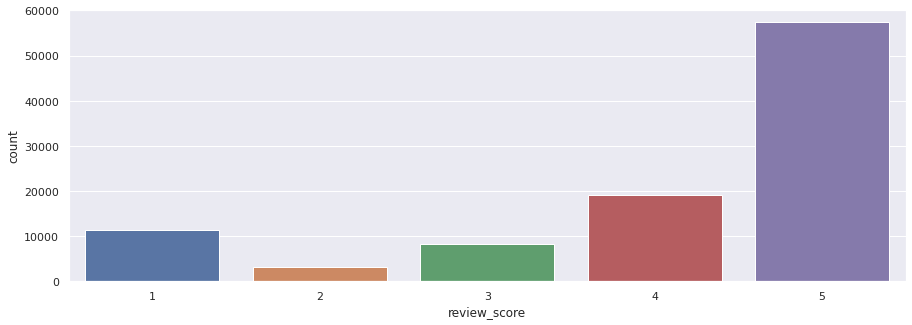

In [152]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x='review_score', data=data['order_reviews']);

❓ Plot a histogram of `order_status` <br/>

In [43]:
status = data['orders'].groupby('order_status').count()
status

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,
approved,2,2,2,2,0,0,2
canceled,625,625,625,484,75,6,625
created,5,5,5,0,0,0,5
delivered,96478,96478,96478,96464,96476,96470,96478
invoiced,314,314,314,314,0,0,314
processing,301,301,301,301,0,0,301
shipped,1107,1107,1107,1107,1107,0,1107
unavailable,609,609,609,609,0,0,609


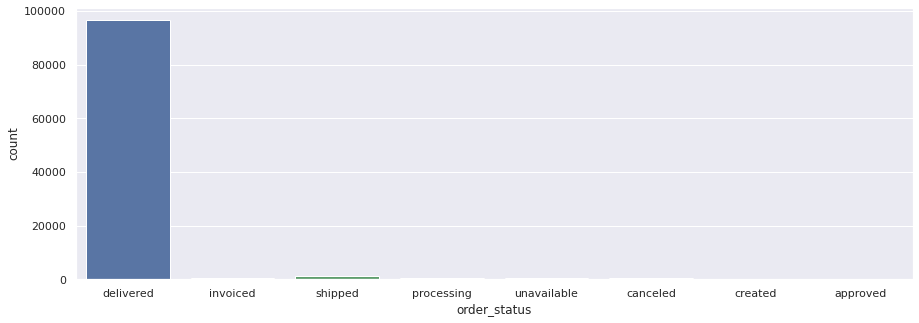

In [154]:
sns.countplot(data = data['orders'], x = 'order_status');

In [45]:
status['order_id']

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

As previously mentioned, we'll check on the number of orders that does not have any reviews

In [46]:
data.keys()

dict_keys(['sellers', 'order_reviews', 'order_items', 'customers', 'orders', 'order_payments', 'product_category_name_translation', 'products', 'geolocation'])

In [47]:
reviewed = data['orders'].merge(data['order_reviews'],on='order_id',how='left')
reviewed['review_id'].isna().sum()

768

For the orders with no reviews, they'll be grouped and sorted as per `order_status`.

In [48]:
notreviewed = reviewed[reviewed['review_id'].isna()]
notreviewed.groupby('order_status').count()['order_id']

order_status
canceled        20
created          2
delivered      646
invoiced         5
processing       6
shipped         75
unavailable     14
Name: order_id, dtype: int64

## 2 - Evolution of key business metrics over the past 14 months

## Metrics 

As we need to check the current business health for Olist, there are several metrics that we will look into.

1. Which metric would be a `key business output metric`for Olist  📈 ? 
2. Which metric would be a good measure that a customer had a `good experience with Olist` 🙂 ? 
3. Which metric would be a measure for `shipping delay` 🕗?


### Metric 1A: Order numbers

For now we check the weekly number of total orders per week (to check how business is going)  


In [49]:
data.keys()

dict_keys(['sellers', 'order_reviews', 'order_items', 'customers', 'orders', 'order_payments', 'product_category_name_translation', 'products', 'geolocation'])

In [50]:
from datetime import datetime

In [62]:
data['orders'].iloc[:,3:]=data['orders'].iloc[:,3:].apply(pd.to_datetime)

In [63]:
data['orders'].dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

❓ Visualize the weekly number of non-delivered orders (to check for any potential issues)

In [64]:
data['orders']['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [65]:
data['orders'].sort_values('order_purchase_timestamp')
base = data['orders']

test1 = base['order_status'] != 'delivered'
test2 = base['order_status'] != 'shipped'
test3 = base['order_status'] != 'canceled'

filtered = base[test1 & test2 & test3]
filtered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19 00:00:00
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15 00:00:00


In [66]:
base[base['order_status']=='invoiced']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21 00:00:00
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28 00:00:00
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06 00:00:00
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20 00:00:00
...,...,...,...,...,...,...,...,...
98414,41ad2ae32ee66c07ef3b0301ba02ad27,5c7f8d14a0a12198d1d07167d7d343b3,invoiced,2017-11-24 15:54:47,2017-11-24 19:33:24,NaT,NaT,2017-12-18 00:00:00
98624,9ffb325177b96c422447e3b9ee9a6270,e4079117ea0dc8bc27274e34c4796515,invoiced,2018-05-10 19:11:18,2018-05-10 19:37:27,NaT,NaT,2018-06-05 00:00:00
98845,021dac6e3120485db6a77474aa21b979,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,2017-11-25 01:53:42,NaT,NaT,2017-12-15 00:00:00
99031,c526fe83c01c48066394ff5d81f9ab9a,6c678c38f3a0874b7bfeeb2d5fb22876,invoiced,2018-08-07 11:11:30,2018-08-07 11:25:01,NaT,NaT,2018-08-17 00:00:00


In [68]:
# YOUR CODE HERE
weekly_order = filtered.resample('W', on = 'order_purchase_timestamp').count()['order_id']
weekly_order

order_purchase_timestamp
2016-10-09    24
2016-10-16     3
2016-10-23     0
2016-10-30     0
2016-11-06     0
              ..
2018-07-29    10
2018-08-05    21
2018-08-12    15
2018-08-19     1
2018-08-26     1
Freq: W-SUN, Name: order_id, Length: 99, dtype: int64

In [171]:
len(weekly_order)

99

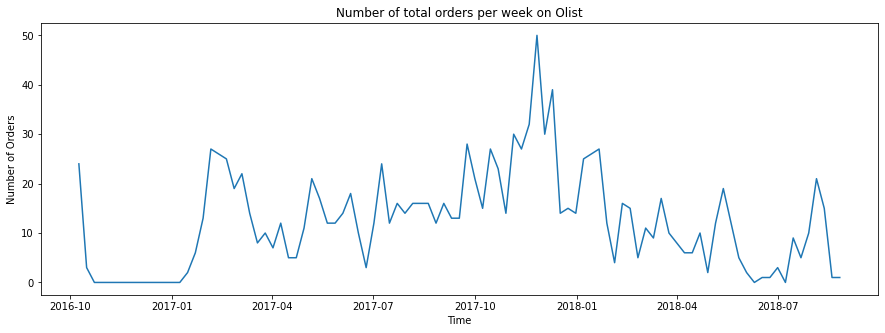

In [81]:
plt.figure(figsize=(15,5))
plt.title("Number of total orders per week on Olist")
plt.ylabel("Number of Orders")
plt.xlabel("Time")
plt.plot(weekly_order);

### Metric 1B: Total payment values
❓ After plotting the total number of orders, we could also have a look at the weekly sum of `payment_value` in `BRL` to approximate Olist's weekly revenues.

In [82]:
data.keys()

dict_keys(['sellers', 'order_reviews', 'order_items', 'customers', 'orders', 'order_payments', 'product_category_name_translation', 'products', 'geolocation'])

In [83]:
data['order_payments']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


💡 Merge the `payments` dataset with the `orders` dataset to collect the date of each payment.

In [84]:
filtered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19 00:00:00
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15 00:00:00


In [85]:
base = filtered.merge(data['order_payments'],on='order_id',how = 'left')
base

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09 00:00:00,1,credit_card,1,65.95
1,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21 00:00:00,1,boleto,1,50.35
2,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03 00:00:00,1,credit_card,2,138.28
3,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05 00:00:00,1,credit_card,5,84.00
4,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09 00:00:00,1,credit_card,1,299.84
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19 00:00:00,1,credit_card,3,110.09
1296,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06 00:00:00,1,boleto,1,210.09
1297,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06 00:00:00,1,boleto,1,144.56
1298,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15 00:00:00,1,credit_card,2,195.91


In [86]:
weekly = base.resample('W', on = 'order_purchase_timestamp').sum()['payment_value']
weekly

order_purchase_timestamp
2016-10-09    5505.38
2016-10-16     596.66
2016-10-23       0.00
2016-10-30       0.00
2016-11-06       0.00
               ...   
2018-07-29    1928.34
2018-08-05    3920.07
2018-08-12    2328.97
2018-08-19     141.92
2018-08-26     268.74
Freq: W-SUN, Name: payment_value, Length: 99, dtype: float64

📈 Visualize the number of orders and total amount of payments per week

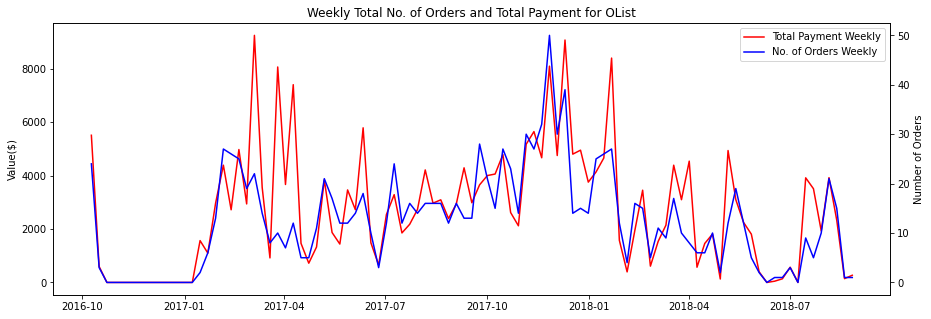

In [133]:
fig,ax = plt.subplots(figsize=(15,5))

ax.plot(weekly, color='r', label="Total Payment Weekly");
ax.set_ylabel("Value($)")

ax2 = ax.twinx()
ax2.plot(weekly_order, color='b', label ="No. of Orders Weekly");
ax2.set_ylabel("Number of Orders")

plt.title("Weekly Total No. of Orders and Total Payment for OList")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes);

### Metric 2: Customer Satisfaction
❓ Now we check the change in `customer satisfaction` for every month by using the mean average `review_score` to illustrate the customer satisfaction.

In [146]:
data.keys()

dict_keys(['sellers', 'order_reviews', 'order_items', 'customers', 'orders', 'order_payments', 'product_category_name_translation', 'products', 'geolocation'])

In [134]:
base_review = data['order_reviews']
base_review

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [135]:
base_review['review_creation_date'] = pd.to_datetime(base_review['review_creation_date'])
base_review

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [136]:
monthly_review = base_review.resample('M', on = 'review_creation_date').mean()
monthly_review

,review_score
review_creation_date,
2016-10-31,4.055866
2016-11-30,3.188119
2016-12-31,2.355556
2017-01-31,4.338912
2017-02-28,4.280962
2017-03-31,4.033051
2017-04-30,4.036983
2017-05-31,4.100539
2017-06-30,4.127616


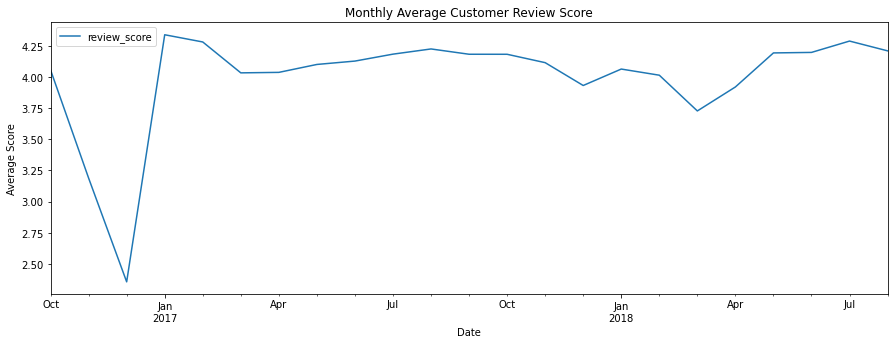

In [144]:
monthly_review.plot(figsize=(15,5),xlabel="Date", ylabel="Average Score", title="Monthly Average Customer Review Score");

### Metric 3: Shipping delay

❓ Two new metrics, `delay_vs_expected` and `wait_time`, are derived from the `orders` dataset to see the historical evolution on a weekly basis to detect trends

In [159]:
orders = data['orders'].query("order_status=='delivered'")
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [163]:
orders.loc[:,'order_delivered_customer_date'] = pd.to_datetime(orders.loc[:,'order_delivered_customer_date'])
orders.loc[:,'order_estimated_delivery_date'] = pd.to_datetime(orders.loc[:,'order_estimated_delivery_date'])
orders.loc[:,'order_purchase_timestamp'] = pd.to_datetime(orders.loc[:,'order_purchase_timestamp'])

/home/ysin/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/ysin/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/ysin/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1773: Setting

👉 Compute the delay between the actual delivery date and the ETA for each order.

In [166]:
orders['delay_vs_expected'] = (orders['order_delivered_customer_date']\
                               - orders['order_estimated_delivery_date']) / np.timedelta64(24, 'h')

/tmp/ipykernel_26041/1131581098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['delay_vs_expected'] = (orders['order_delivered_customer_date']\


👉 Compute the waiting time between the actual delivery date and the moment a customer ordered their items

In [167]:
orders['wait_time'] = (orders['order_delivered_customer_date'] -\
                       orders['order_purchase_timestamp']) / np.timedelta64(24, 'h')

/tmp/ipykernel_26041/4266504214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['wait_time'] = (orders['order_delivered_customer_date'] -\


⌛️ How many orders were delivered later than expected ? <br/>
*You can also give an answer in terms of percentage if you prefer.*
<details>
    <summary><i>▸ Hint </i></summary>

    
You can create a `boolean_feature` which is :
* True when actual_delivered_date > ETA $\leftrightarrow$ actual_delivered_date - ETA > 0
* False otherwise
    
</details>




In [168]:
# create a boolean feature that says whether an order was delivered with a delay or not
# delay_vs_expected > 0 
# <=> actual_delivered date > ETA 
# <=> actual_delivered date - ETA > 0

orders["was_late"] = orders['delay_vs_expected'].map(lambda x: x > 0)

# early_or_in_time is just a nice column but it's redundant with the was_late
orders["early_or_on_time"] = orders["was_late"].map({True:"late",False:"in_time"})

/tmp/ipykernel_26041/1259001683.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders["was_late"] = orders['delay_vs_expected'].map(lambda x: x > 0)
/tmp/ipykernel_26041/1259001683.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders["early_or_on_time"] = orders["was_late"].map({True:"late",False:"in_time"})


In [169]:
orders["early_or_on_time"].value_counts()

in_time    88652
late        7826
Name: early_or_on_time, dtype: int64

In [170]:
round(orders["early_or_on_time"].value_counts(normalize = True),2)

in_time    0.92
late       0.08
Name: early_or_on_time, dtype: float64

* On average, 8% of the orders are delivered after the ETA ⌛️

In [171]:
delay_analysis_per_week = orders.set_index('order_purchase_timestamp').resample('W').agg({
    'delay_vs_expected':np.mean,
    'wait_time':np.mean,
    'was_late':np.sum,
    'order_id':'count'})

delay_analysis_per_week.columns = ['avg_delay_vs_exp', 'avg_wait_time','nb_of_delays', 'nb_of_orders']

delay_analysis_per_week['pct_of_lateness'] = delay_analysis_per_week['nb_of_delays'] / delay_analysis_per_week['nb_of_orders']

print("-"*40)
print("Delay Analysis per week")
print("-"*40)
display(round(delay_analysis_per_week.tail(10),2))

----------------------------------------
Delay Analysis per week
----------------------------------------


,avg_delay_vs_exp,avg_wait_time,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,,,
2018-07-01,-16.78,8.33,10,1382,0.01
2018-07-08,-13.84,8.52,19,1178,0.02
2018-07-15,-9.88,11.27,59,972,0.06
2018-07-22,-10.40,9.03,65,1649,0.04
2018-07-29,-9.92,8.32,63,1610,0.04
2018-08-05,-6.57,8.66,276,2002,0.14
2018-08-12,-7.01,8.49,243,1931,0.13
2018-08-19,-8.52,7.63,133,1839,0.07
2018-08-26,-8.32,5.48,71,1054,0.07


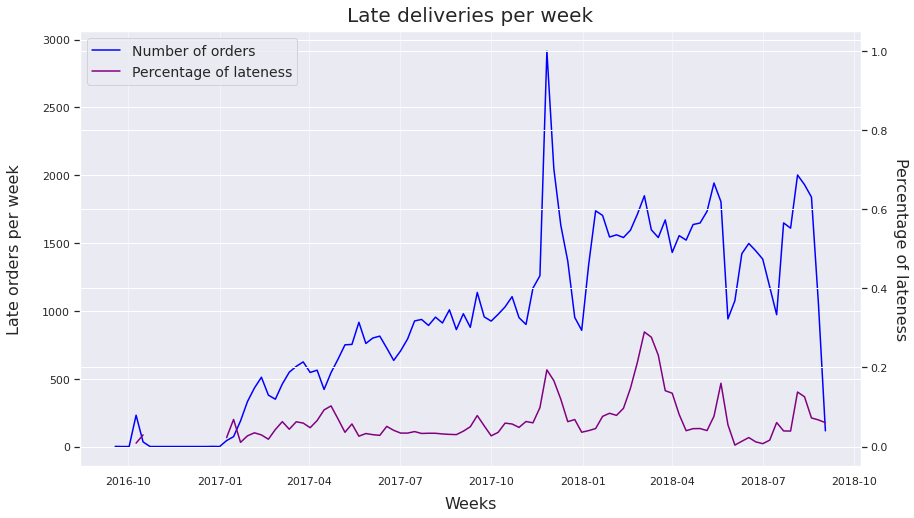

In [172]:
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(14,8))
    # getting axes
    ax1 = plt.gca()
    # duplicating the ax1
    ax2 = ax1.twinx()
    # Weekly payments and Mean Payments
    
    ax1.plot(delay_analysis_per_week['nb_of_orders'],
             color="blue",
             label="Number of orders")
    ax1.set_xlabel("Weeks", 
                   fontsize = 16, 
                   labelpad = 10)
    ax1.set_ylabel("Late orders per week", 
                   fontsize = 16, 
                   labelpad = 20)

    # Numbers
    ax2.plot(delay_analysis_per_week['pct_of_lateness'],
             label="Percentage of lateness",
             c="purple")
    ax2.set_ylabel("Percentage of lateness", 
                   fontsize = 16, 
                   rotation = 90*3, 
                   labelpad = 20)

    # Get a conjoined legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left', fontsize = 14)

    # Title
    ax1.set_title('Late deliveries per week', 
                  fontsize = 20, 
                  pad = 10)
    
    # Vertical lines
    #ax1.xvlines(x="2018-03-04")

    # Grid
    ax1.grid(axis="x",linewidth=0.5)
    plt.show()

#### Delay Analysis

📈 📉 From the previous graph, Olist experienced major lateness issues on 3-4 weeks ⚠️...

👉 Let's deep dive into these peaks of lateness.

In [173]:
round(delay_analysis_per_week[['nb_of_delays', 'nb_of_orders','pct_of_lateness']].sort_values(by = 'pct_of_lateness', ascending = False).head(10),2)

,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2016-09-18,1,1,1.00
2018-03-04,536,1849,0.29
2018-03-11,442,1598,0.28
2018-03-18,356,1541,0.23
2018-02-25,365,1713,0.21
2017-11-26,565,2915,0.19
2017-12-03,341,2047,0.17
2018-05-20,289,1805,0.16
2018-02-18,235,1595,0.15


In [174]:
lateness_20_and_more = delay_analysis_per_week.query("pct_of_lateness >= 0.20")
display(round(lateness_20_and_more[1:][['nb_of_delays', 'nb_of_orders','pct_of_lateness']],2))

,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2018-02-25,365,1713,0.21
2018-03-04,536,1849,0.29
2018-03-11,442,1598,0.28
2018-03-18,356,1541,0.23


In [175]:
lateness_15_20 = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.15,0.20)]
display(round(lateness_15_20[['nb_of_delays', 'nb_of_orders','pct_of_lateness']],2))

,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2017-11-26,565,2915,0.19
2017-12-03,341,2047,0.17
2018-05-20,289,1805,0.16


In [176]:
lateness_10_15 = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.10,0.15)]
display(round(lateness_10_15[['nb_of_delays', 'nb_of_orders','pct_of_lateness']],2))

,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2017-04-23,56,545,0.10
2017-12-10,195,1631,0.12
2018-02-18,235,1595,0.15
2018-03-25,236,1671,0.14
2018-04-01,193,1431,0.13
2018-08-05,276,2002,0.14
2018-08-12,243,1931,0.13


In [177]:
lateness_05_10 = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.05,0.10)]
lateness_05_and_less = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.00,0.05)]
lateness_brackets = pd.Series([
    " ≥ 20%",
    "15% - 20%",
    "10% - 15%",
    "5% - 10%",
    " ≤ 5%"
])

lateness_numbers = pd.Series([
    lateness_20_and_more.shape[0]-1,
    lateness_15_20.shape[0],
    lateness_10_15.shape[0],
    lateness_05_10.shape[0],
    lateness_05_and_less.shape[0]
    
])

lateness_df = pd.concat([lateness_brackets,lateness_numbers],axis = 1)
lateness_df.columns = ['brackets', 'nb_weeks']

display(lateness_df)

,brackets,nb_weeks
0,≥ 20%,4
1,15% - 20%,3
2,10% - 15%,7
3,5% - 10%,30
4,≤ 5%,46


In [178]:
np.sum(lateness_df['nb_weeks'])

90

⚠️⚠️⚠️ Among these 90 weeks, Olist encountered serious troubles⚠️⚠️⚠️
* there are 4 weeks for which more than 20% of the orders were delivered way later than expected
* there are 3 weeks for which more 15-20% of the orders were delivered way later than expected
* there are 7 weeks for which more 10-15% of the orders were delivered way later than expected